In [1]:
import importlib
import os
from dotenv import load_dotenv

from art.utils.benchmarking.load_trajectories import load_trajectories
from art.utils.benchmarking.charts import (
    percentage_comparison_bar_chart,
    training_progress_chart,
)
import art.utils.benchmarking.charts
from art.utils.benchmarking.types import BenchmarkModelKey
from art.utils.get_repo_root_path import get_repo_root_path
from art.utils.s3 import pull_model_from_s3


importlib.reload(art.utils.benchmarking.charts)

load_dotenv()

project_name = "mcp-agent-training"

PULL_MODELS = True
if PULL_MODELS:
    await pull_model_from_s3(
        model_name="mcp-006",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="gpt-4o-mini",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="gpt-4o",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="gpt-4.1",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="sonnet-4",
        project=project_name,
    )
    

df = await load_trajectories(
    project_name=project_name,
    models=["mcp-006", "gpt-4o-mini", "gpt-4o", "gpt-4.1", "sonnet-4"],
)

print(df)
# print every column name
print(df.columns)


benchmarks_dir = f"{get_repo_root_path()}/assets/benchmarks/{project_name}"

os.makedirs(benchmarks_dir, exist_ok=True)

Models:   0%|          | 0/5 [00:00<?, ?model/s]

gpt-4o/val:   0%|          | 0/1 [00:00<?, ?file/s]

sonnet-4/val:   0%|          | 0/1 [00:00<?, ?file/s]

gpt-4o-mini/val:   0%|          | 0/1 [00:00<?, ?file/s]

shape: (36, 13)
┌─────────────┬───────┬──────┬────────┬───┬──────────────┬─────────────┬─────────────┬─────────────┐
│ model       ┆ split ┆ step ┆ reward ┆ … ┆ metric_num_t ┆ metric_llm_ ┆ metric_succ ┆ metadata_ta │
│ ---         ┆ ---   ┆ ---  ┆ ---    ┆   ┆ urns         ┆ completion_ ┆ ess         ┆ sk          │
│ str         ┆ str   ┆ i64  ┆ f64    ┆   ┆ ---          ┆ duration    ┆ ---         ┆ ---         │
│             ┆       ┆      ┆        ┆   ┆ f64          ┆ ---         ┆ f64         ┆ str         │
│             ┆       ┆      ┆        ┆   ┆              ┆ f64         ┆             ┆             │
╞═════════════╪═══════╪══════╪════════╪═══╪══════════════╪═════════════╪═════════════╪═════════════╡
│ gpt-4o      ┆ val   ┆ 0    ┆ 0.0    ┆ … ┆ 1.0          ┆ 1.316894    ┆ 0.0         ┆             │
│ gpt-4o      ┆ val   ┆ 0    ┆ 0.0    ┆ … ┆ 1.0          ┆ 1.330229    ┆ 0.0         ┆             │
│ gpt-4o      ┆ val   ┆ 0    ┆ 0.0    ┆ … ┆ 1.0          ┆ 1.362591    ┆ 0.

In [5]:
import polars as pl

print("metric_success column info:")
print(f"Data type: {df['metric_success'].dtype}")
print(f"Unique values: {df['metric_success'].unique()}")
print(f"Null count: {df['metric_success'].null_count()}")
print(f"Non-null count: {len(df) - df['metric_success'].null_count()}")

# Check data for the specific models you're using
models_to_check = ["mcp-006", "gpt-4o-mini", "gpt-4o", "gpt-4.1", "sonnet-4"]
for model in models_to_check:
    model_data = df.filter(pl.col("model") == model)
    print(f"\nModel {model}:")
    print(f"  Rows: {len(model_data)}")
    print(f"  metric_success values: {model_data['metric_success'].unique()}")

metric_success column info:
Data type: Float64
Unique values: shape: (2,)
Series: 'metric_success' [f64]
[
	0.0
	1.0
]
Null count: 0
Non-null count: 36

Model mcp-006:
  Rows: 0
  metric_success values: shape: (0,)
Series: 'metric_success' [f64]
[
]

Model gpt-4o-mini:
  Rows: 12
  metric_success values: shape: (2,)
Series: 'metric_success' [f64]
[
	0.0
	1.0
]

Model gpt-4o:
  Rows: 12
  metric_success values: shape: (1,)
Series: 'metric_success' [f64]
[
	0.0
]

Model gpt-4.1:
  Rows: 0
  metric_success values: shape: (0,)
Series: 'metric_success' [f64]
[
]

Model sonnet-4:
  Rows: 12
  metric_success values: shape: (1,)
Series: 'metric_success' [f64]
[
	0.0
]


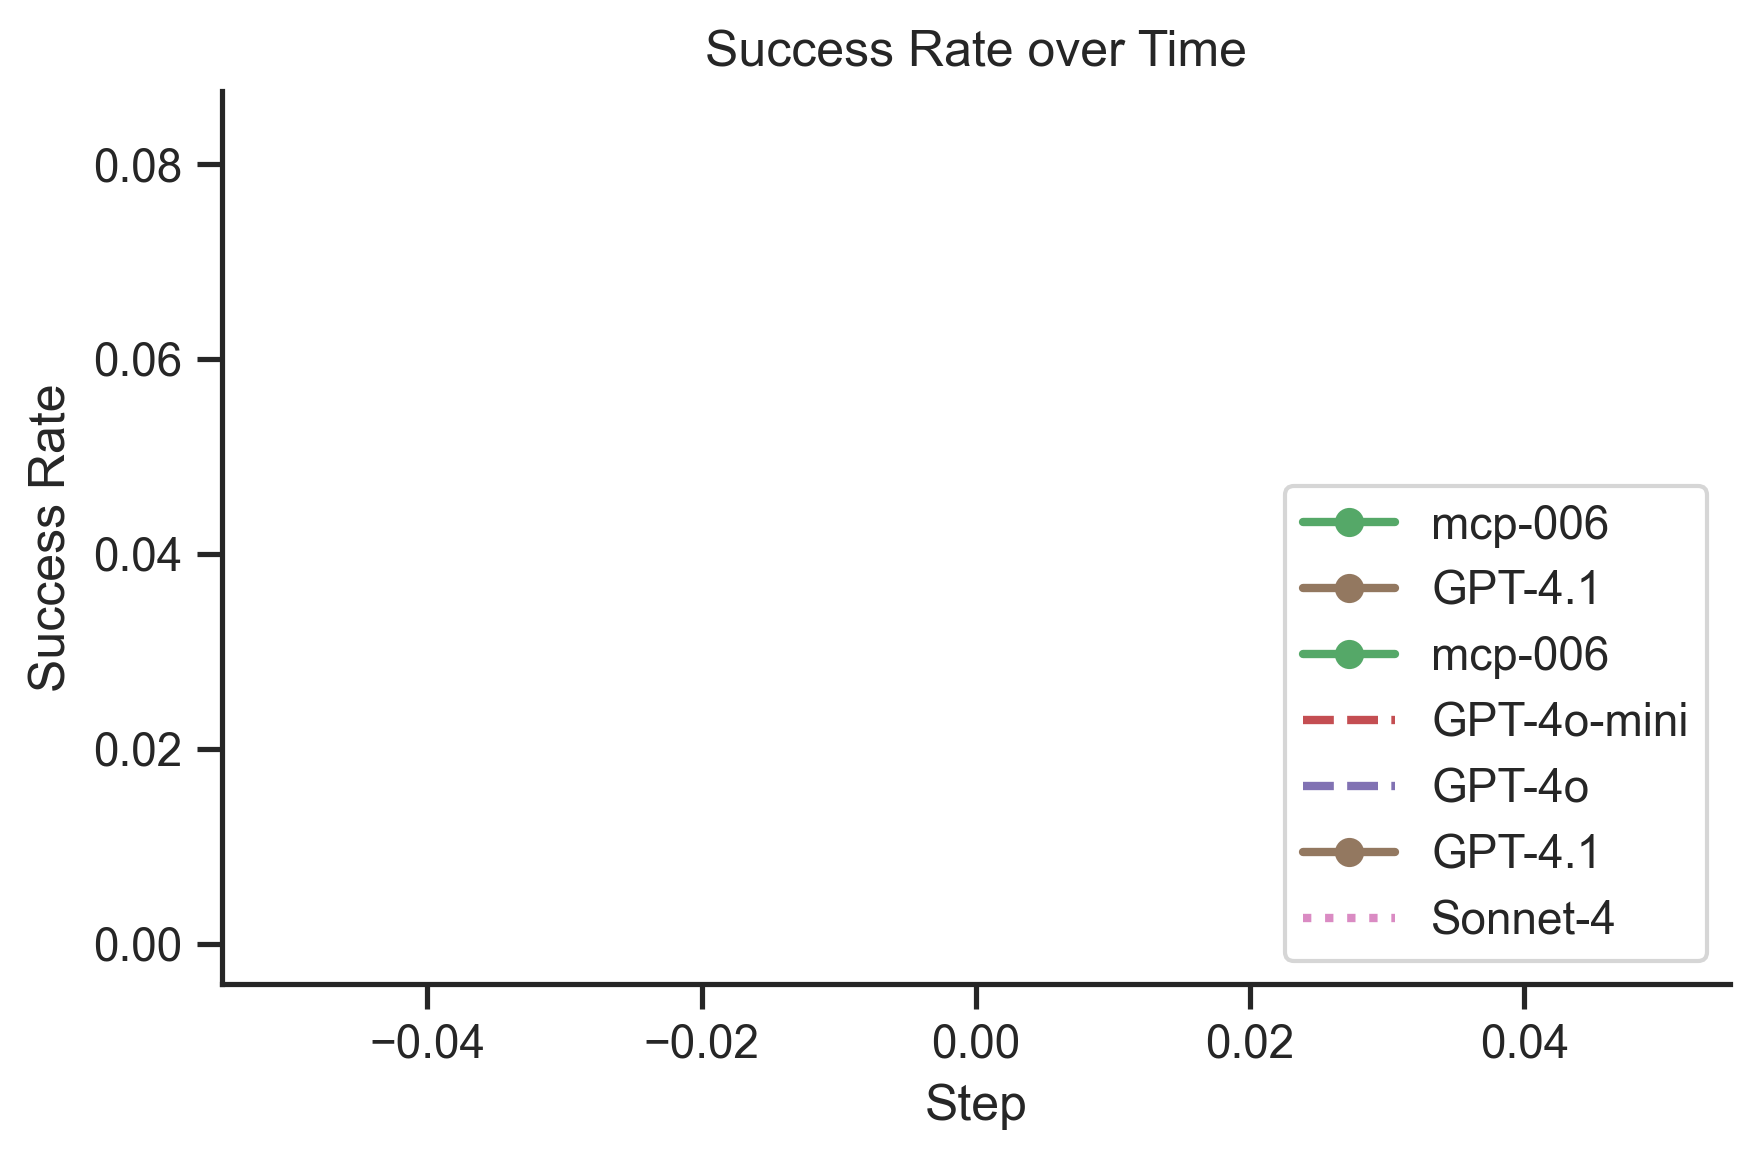

In [6]:
line_graph = training_progress_chart(
    df,
    "success",
    models=[
        BenchmarkModelKey("mcp-006", "mcp-006", "train"),
        BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4"),
    ],
    title="Success Rate over Time",
    y_label="Success Rate",
)
line_graph.savefig(f"{benchmarks_dir}/accuracy-training-progress.svg")

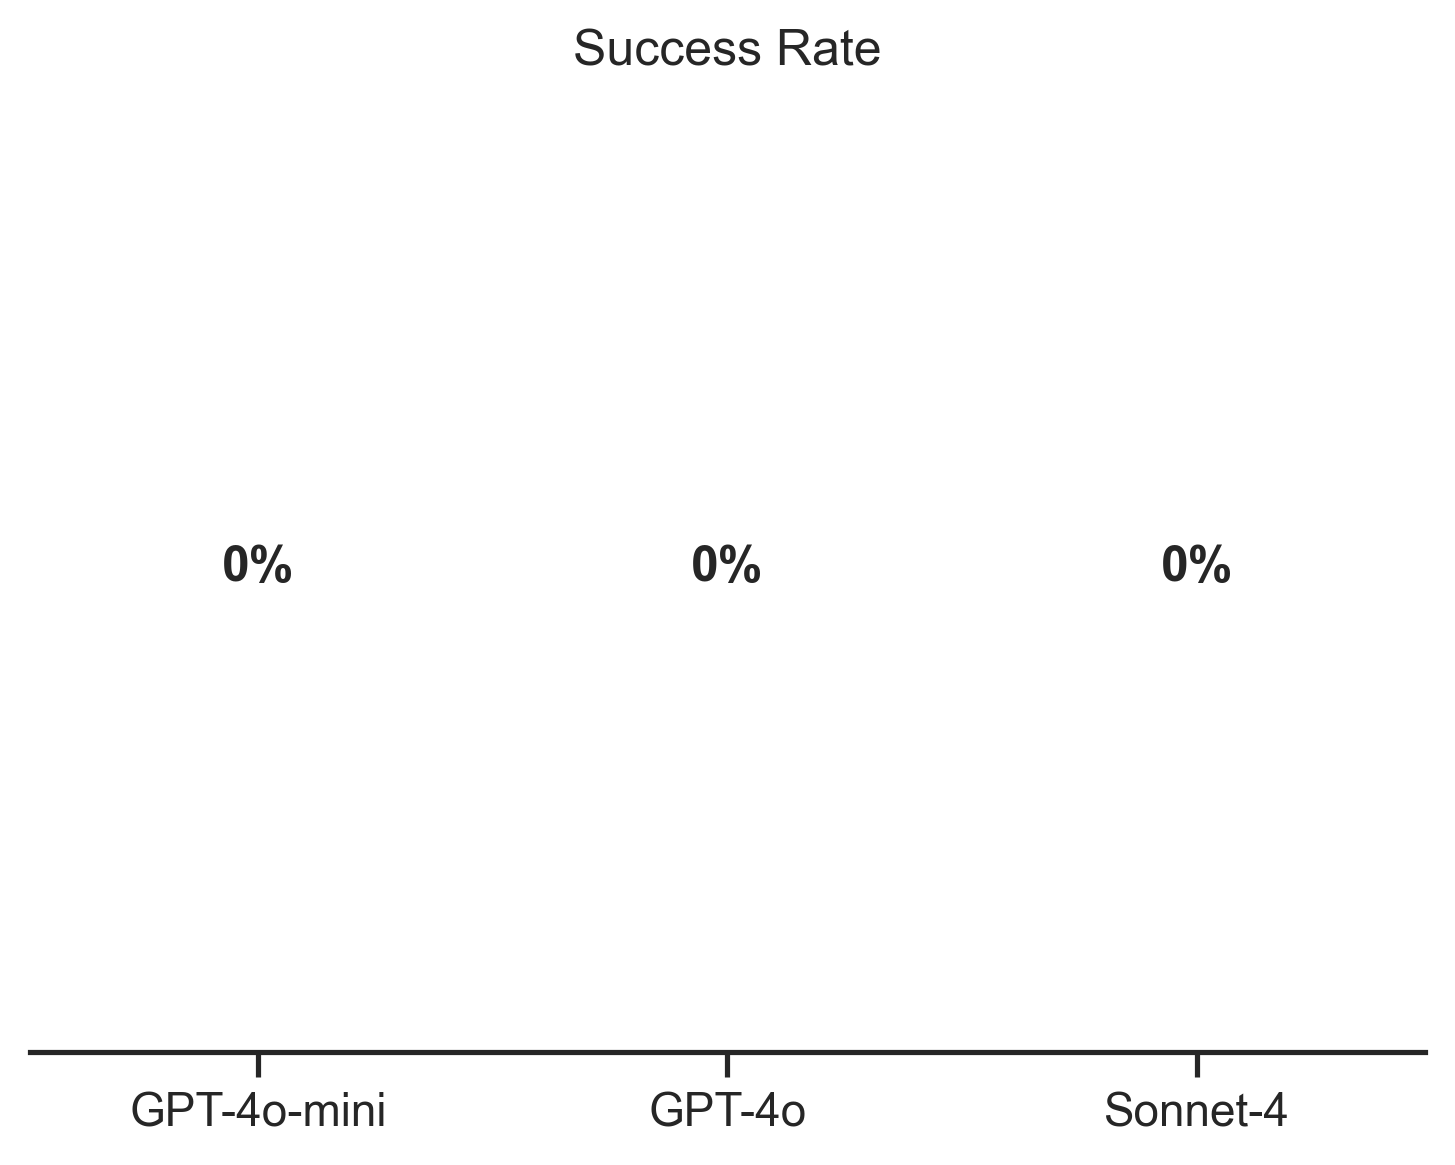

In [9]:
bar_chart = percentage_comparison_bar_chart(
    df,
    metric_name="task_completed",
    models=[
        BenchmarkModelKey("mcp-006", "mcp-006", "train"),
        BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4"),
    ],
    title="Success Rate",
)
bar_chart.savefig(f"{benchmarks_dir}/accuracy-comparison.svg")